## Смешанная задача для уравнения теплопроводности


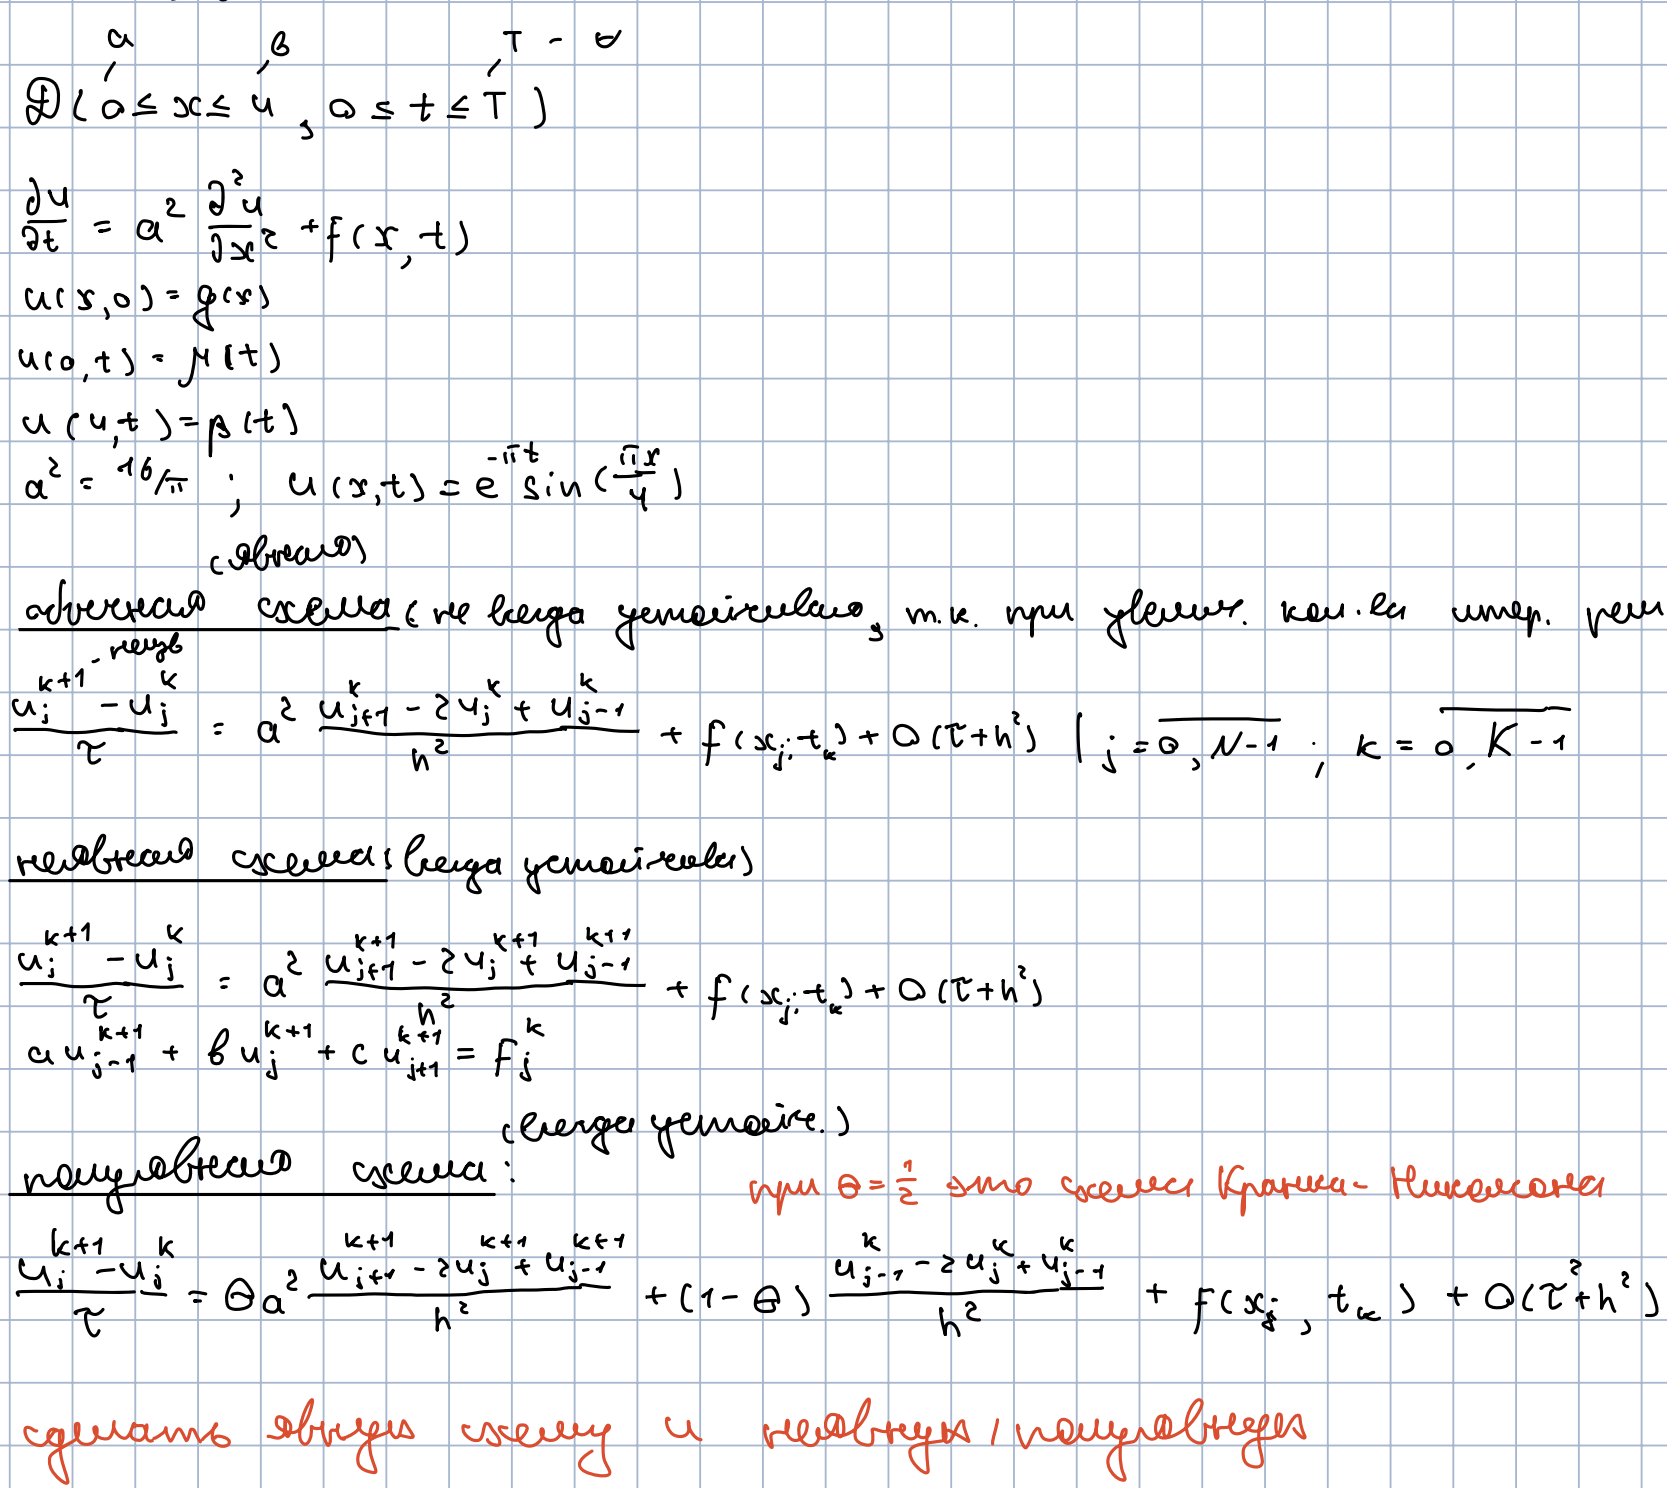

In [167]:
import numpy as np
import matplotlib.pyplot as plt

In [168]:
a2 = 16 / np.pi
T = 1
L = 4
N = 200
M = 30000
h = L / (N - 1)
tau = T / (M - 1)

print(a2 * tau / h**2)

if a2 * tau / h**2 > 0.5:
    raise ValueError("Условие устойчивости для явной схемы не выполнено!")

x = np.linspace(0, L, N)
u_init = np.sin(np.pi * x / 4)

0.4201936665476948


In [169]:
mu = lambda t: 0
beta = lambda t: 0


def exact_solution(x, t):
    return np.exp(-np.pi * t) * np.sin(np.pi * x / 4)


def explicit_scheme(u_init, h, tau, a2, mu, beta):
    u = u_init.copy()
    u_all = [u.copy()]
    
    for n in range(M):
        u_new = u.copy()
        
        for i in range(1, N - 1):
            u_new[i] = u[i] + a2 * tau / h**2 * (u[i + 1] - 2 * u[i] + u[i - 1])
            
        u_new[0] = mu(n * tau)
        u_new[-1] = beta(n * tau)
        u = u_new
        u_all.append(u.copy())
        
    return np.array(u_all)


def implicit_scheme(u_init, h, tau, a2, mu, beta):
    sigma = a2 * tau / h**2
    A = -sigma * np.ones(N - 2)
    B = (1 + 2 * sigma) * np.ones(N - 2)
    C = -sigma * np.ones(N - 2)

    u = u_init.copy()
    u_all = [u.copy()]
    
    for n in range(M):
        d = u[1:-1].copy()
        d[0] += sigma * mu(n * tau)
        d[-1] += sigma * beta(n * tau)

        P = np.zeros(N - 2)
        Q = np.zeros(N - 2)
        P[0] = -C[0] / B[0]
        Q[0] = d[0] / B[0]
        
        for i in range(1, N - 2):
            P[i] = -C[i] / (B[i] + A[i] * P[i - 1])
            Q[i] = (d[i] - A[i] * Q[i - 1]) / (B[i] + A[i] * P[i - 1])

        u_new = u.copy()
        u_new[-2] = Q[-1]
        
        for i in range(N - 3, -1, -1):
            u_new[i + 1] = P[i] * u_new[i + 2] + Q[i]

        u_new[0] = mu(n * tau)
        u_new[-1] = beta(n * tau)
        u = u_new
        u_all.append(u.copy())
        
    return np.array(u_all)

In [170]:
u_explicit = explicit_scheme(u_init, h, tau, a2, mu, beta)
u_implicit = implicit_scheme(u_init, h, tau, a2, mu, beta)

t = np.linspace(0, T, M + 1)
X, T_grid = np.meshgrid(x, t)
u_exact = exact_solution(X, T_grid)

In [171]:
error_explicit = np.abs(u_explicit - u_exact)
error_implicit = np.abs(u_implicit - u_exact)

In [172]:
np.max(error_explicit)

np.float64(2.388486639026688e-05)

In [173]:
np.max(error_implicit)

np.float64(1.4638661944399445e-05)

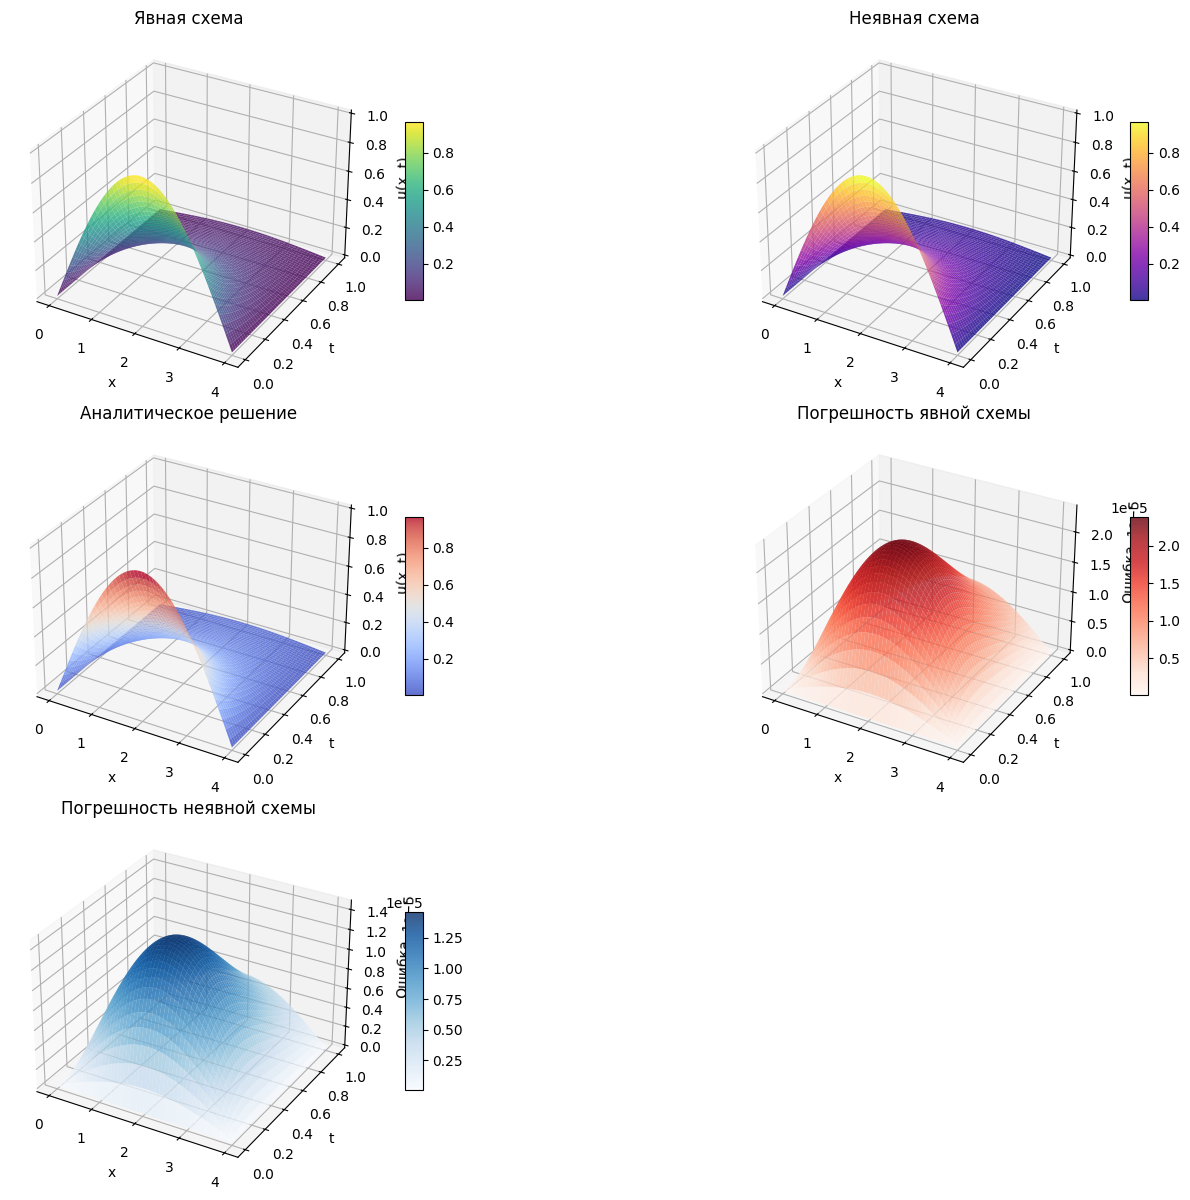

In [174]:
fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 2, 1, projection="3d")
surf1 = ax1.plot_surface(X, T_grid, u_explicit, cmap="viridis", alpha=0.8)
ax1.set_title("Явная схема")
ax1.set_xlabel("x")
ax1.set_ylabel("t")
ax1.set_zlabel("u(x, t)")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

ax2 = fig.add_subplot(3, 2, 2, projection="3d")
surf2 = ax2.plot_surface(X, T_grid, u_implicit, cmap="plasma", alpha=0.8)
ax2.set_title("Неявная схема")
ax2.set_xlabel("x")
ax2.set_ylabel("t")
ax2.set_zlabel("u(x, t)")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

ax3 = fig.add_subplot(3, 2, 3, projection="3d")
surf3 = ax3.plot_surface(X, T_grid, u_exact, cmap="coolwarm", alpha=0.8)
ax3.set_title("Аналитическое решение")
ax3.set_xlabel("x")
ax3.set_ylabel("t")
ax3.set_zlabel("u(x, t)")
fig.colorbar(surf3, ax=ax3, shrink=0.5, aspect=10)

ax4 = fig.add_subplot(3, 2, 4, projection="3d")
surf4 = ax4.plot_surface(X, T_grid, error_explicit, cmap="Reds", alpha=0.8)
ax4.set_title("Погрешность явной схемы")
ax4.set_xlabel("x")
ax4.set_ylabel("t")
ax4.set_zlabel("Ошибка")
fig.colorbar(surf4, ax=ax4, shrink=0.5, aspect=10)

ax5 = fig.add_subplot(3, 2, 5, projection="3d")
surf5 = ax5.plot_surface(X, T_grid, error_implicit, cmap="Blues", alpha=0.8)
ax5.set_title("Погрешность неявной схемы")
ax5.set_xlabel("x")
ax5.set_ylabel("t")
ax5.set_zlabel("Ошибка")
fig.colorbar(surf5, ax=ax5, shrink=0.5, aspect=10)

plt.tight_layout()
plt.show()